# DIVE INTO CODE COURSE
## Introductory Machine Learning Pre-Class assignment 2 Predicting House Prices
### Doan Anh Tien - 1852789 - tien.doan.g0pr0@hcmut.edu.vn

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

In [113]:
df = pd.read_csv('house_prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### \[Problem 1] Feature selection for practice
### Extract data

In [114]:
x = df[['GrLivArea', 'YearBuilt']]
y = df[['SalePrice']]

In [115]:
frames = [x, y]
dataset = pd.concat(frames, axis=1)
dataset

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


### Check missing data

In [116]:
dataset.isna().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

### Dataset splitting

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("Train data: \n x = {} \n y = {} \n\n Test data: \n x = {} \n y = {} \n".format(x_train, x_test, y_train, y_test))

Train data: 
 x =       GrLivArea  YearBuilt
1023       1504       2005
810        1309       1974
1384       1258       1939
626        1422       1960
813        1442       1958
...         ...        ...
1095       1314       2006
1130       1981       1928
1294        864       1955
860        1426       1918
1126       1555       2007

[1095 rows x 2 columns] 
 y =       GrLivArea  YearBuilt
892        1068       1963
1105       2622       1994
413        1028       1927
522        1664       1947
1036       1620       2007
...         ...        ...
988        2030       1976
243        1217       1980
1342       2169       2002
1057       1850       1994
1418       1144       1963

[365 rows x 2 columns] 

 Test data: 
 x =       SalePrice
1023     191000
810      181000
1384     105000
626      139900
813      157900
...         ...
1095     176432
1130     135000
1294     115000
860      189950
1126     174000

[1095 rows x 1 columns] 
 y =       SalePrice
892      154500
1105

### Standardization

In [118]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### \[Problem 2] Estimation and evaluation by linear regression

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Linear Regression model

In [120]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
predicted = model.predict(x_test_scaled)

In [121]:
model.intercept_

array([181712.28675799])

In [122]:
mean_squared_error(predicted, y_test)

2314465092.7320137

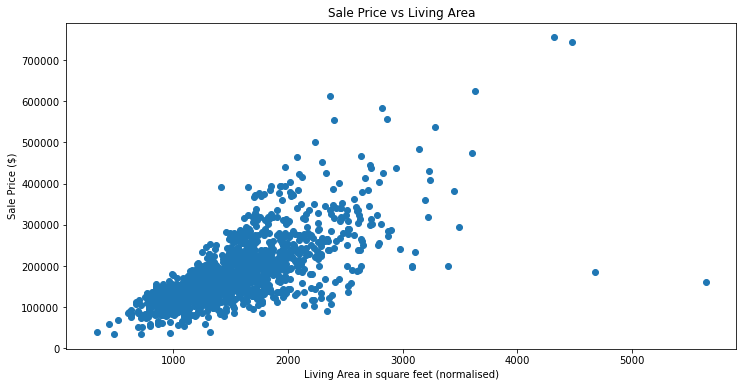

In [123]:
fig = plt.figure(figsize=(12,6))
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x['GrLivArea'], y)

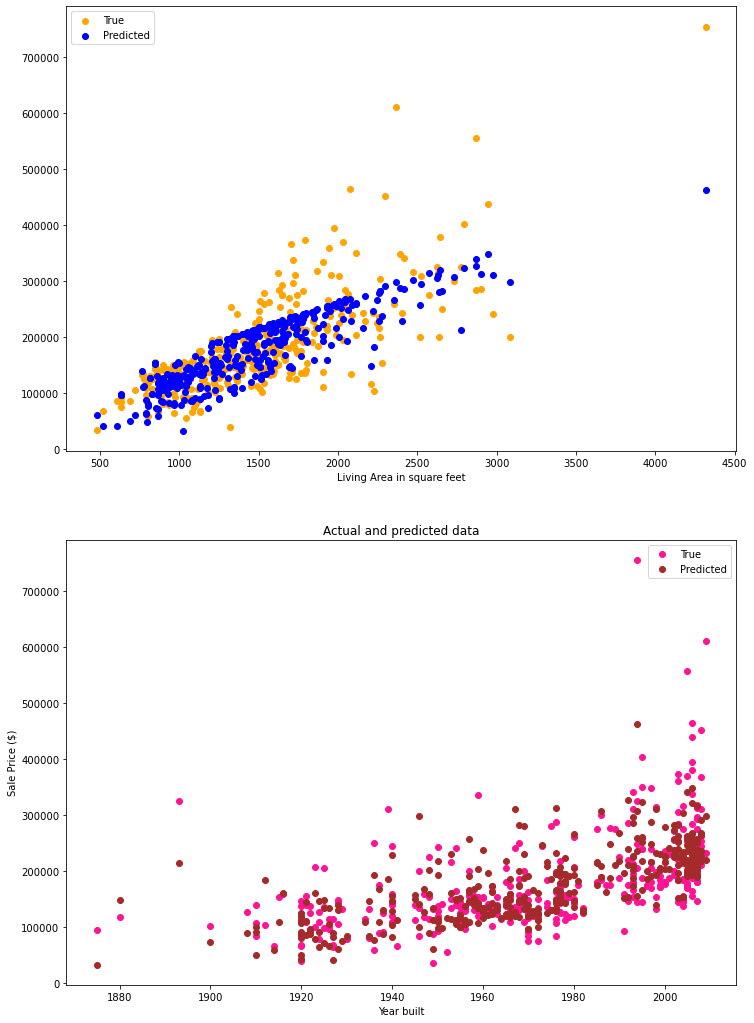

In [124]:
fig, axs = plt.subplots(2, 1, figsize=(12,18))
plt.title('Actual and predicted data')
plt.ylabel('Sale Price ($)')
axs[0].scatter(x_test['GrLivArea'], y_test, color="orange", label="True")
axs[0].scatter(x_test['GrLivArea'], predicted, color="blue", label="Predicted")
axs[0].set_xlabel('Living Area in square feet')
axs[0].legend()
axs[1].scatter(x_test['YearBuilt'], y_test, color="deeppink", label="True")
axs[1].scatter(x_test['YearBuilt'], predicted, color="brown", label="Predicted")
axs[1].set_xlabel('Year built')
axs[1].legend()

From my perspective, it seems like that the price predicted based on YearBuilt feature or the correlation between them is more accurate than the GrLivArea feature (Living Area)

### \[Problem 3] Comparison of methods

### Linear Regression method

In [125]:
linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled, y_train)
linear_predict = linear_reg.predict(x_test_scaled)

### SVR Method

In [126]:
from sklearn.svm import SVR

In [127]:
svr_reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_reg.fit(x_train_scaled, y_train.values.ravel())
svr_predict = svr_reg.predict(x_test_scaled)

### Decision Tree Regresssor

In [128]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor(random_state=0)
decision_reg.fit(x_train_scaled, y_train)
decision_predict = decision_reg.predict(x_test_scaled)

### Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(max_depth=2, random_state=0)
random_reg.fit(x_train_scaled, y_train.values.ravel())
random_predict = random_reg.predict(x_test_scaled)

Let select one feature to make scatter plot. Here I choose GrLivArea first

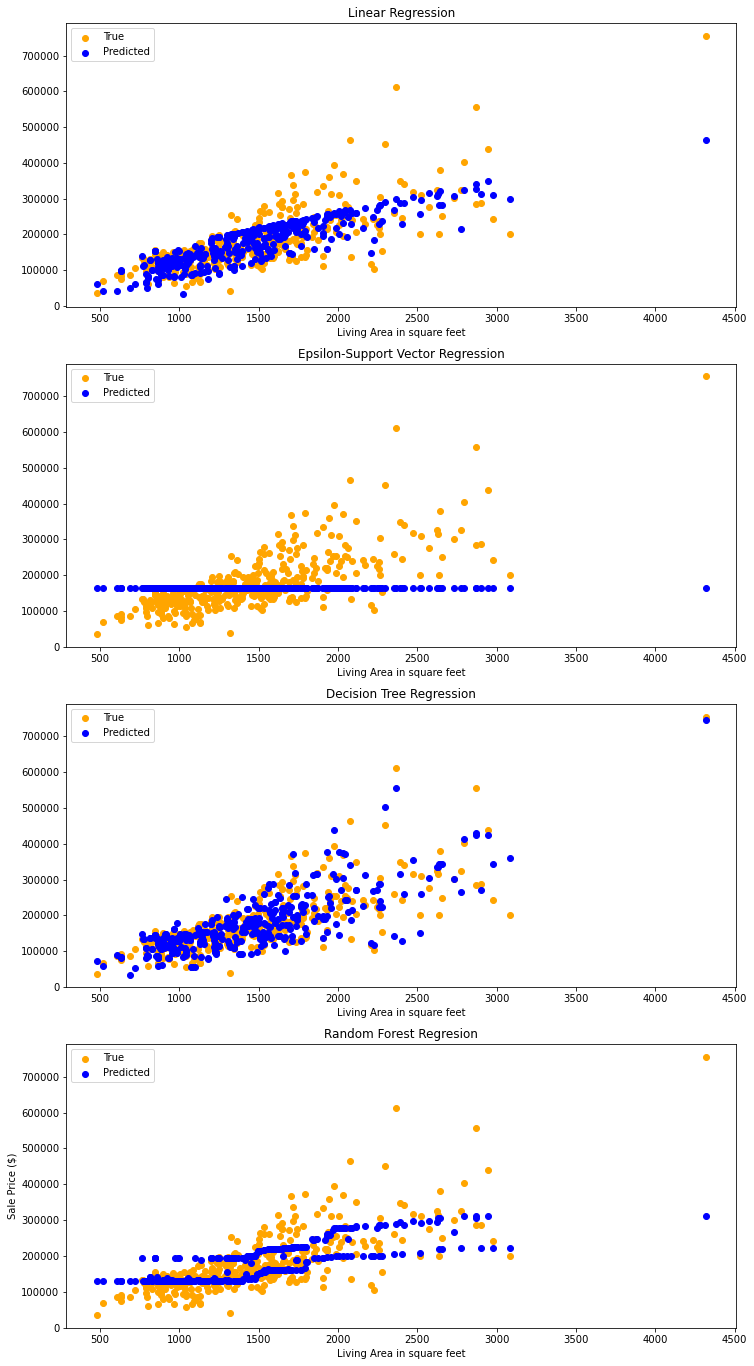

In [130]:
methods = ['Linear Regression', 'Epsilon-Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regresion']
predict_values = [linear_predict, svr_predict, decision_predict, random_predict]

fig, axs = plt.subplots(4, 1, figsize=(12,24))
plt.title('Actual and predicted data')
plt.ylabel('Sale Price ($)')

for i in range(4):
    axs[i].scatter(x_test['GrLivArea'], y_test, color="orange", label="True")
    axs[i].scatter(x_test['GrLivArea'], predict_values[i], color="blue", label="Predicted")
    axs[i].set_xlabel('Living Area in square feet')
    axs[i].title.set_text(methods[i])
    axs[i].legend()

Next we display the result with the feature YearBuilt

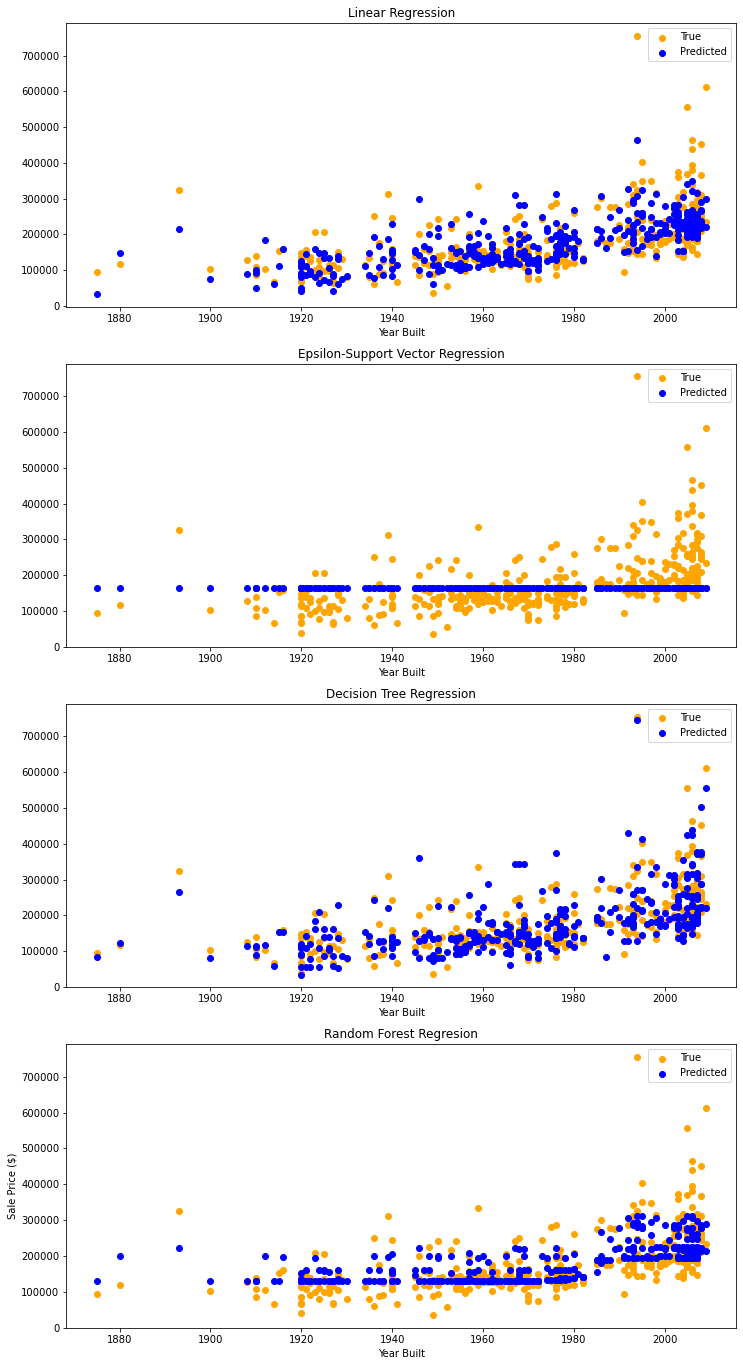

In [131]:
fig, axs = plt.subplots(4, 1, figsize=(12,24))
plt.title('Actual and predicted data')
plt.ylabel('Sale Price ($)')

for i in range(4):
    axs[i].scatter(x_test['YearBuilt'], y_test, color="orange", label="True")
    axs[i].scatter(x_test['YearBuilt'], predict_values[i], color="blue", label="Predicted")
    axs[i].set_xlabel('Year Built')
    axs[i].title.set_text(methods[i])
    axs[i].legend()

From the graphs, it seems like the Decision Tree Regressor is the method having best performance and accurate, especially at the last point where its value was precisely predicted, meanwhile other methods have a huge gap at that pont.

On the other hand, the SVR method is quite abnormal as the predicted values make an evenly straight line. Linear Regression still did the job well compare, whereas the Random Forest Regression witnessed an increasingly in SalePrice (just what we expected for) but it is still not accurate like Linear Regression.

### \[Problem 4] (Advance assignment) Learning using other features

In [137]:
x = df[['GrLivArea', 'YearBuilt', 'OverallCond', 'GarageArea']]
y = df[['SalePrice']]

In [138]:
frames = [x, y]
dataset = pd.concat(frames, axis=1)
dataset

,GrLivArea,YearBuilt,OverallCond,GarageArea,SalePrice
0,1710,2003,5,548,208500
1,1262,1976,8,460,181500
2,1786,2001,5,608,223500
3,1717,1915,5,642,140000
4,2198,2000,5,836,250000
...,...,...,...,...,...
1455,1647,1999,5,460,175000
1456,2073,1978,6,500,210000
1457,2340,1941,9,252,266500
1458,1078,1950,6,240,142125


### Check missing data

In [139]:
dataset.isna().sum()

GrLivArea      0
YearBuilt      0
OverallCond    0
GarageArea     0
SalePrice      0
dtype: int64

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("Train data: \n x = {} \n y = {} \n\n Test data: \n x = {} \n y = {} \n".format(x_train, x_test, y_train, y_test))

Train data: 
 x =       GrLivArea  YearBuilt  OverallCond  GarageArea
1023       1504       2005            5         437
810        1309       1974            6         484
1384       1258       1939            5         280
626        1422       1960            5         286
813        1442       1958            6         301
...         ...        ...          ...         ...
1095       1314       2006            5         440
1130       1981       1928            3         576
1294        864       1955            7         572
860        1426       1918            8         216
1126       1555       2007            5         660

[1095 rows x 4 columns] 
 y =       GrLivArea  YearBuilt  OverallCond  GarageArea
892        1068       1963            8         264
1105       2622       1994            5         712
413        1028       1927            6         360
522        1664       1947            7         420
1036       1620       2007            5         912
...         ...

In [141]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear Regression method

In [142]:
linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled, y_train)
linear_predict = linear_reg.predict(x_test_scaled)

### SVN method

In [143]:
svr_reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_reg.fit(x_train_scaled, y_train.values.ravel())
svr_predict = svr_reg.predict(x_test_scaled)

### Decision Tree Regressor

In [145]:
decision_reg = DecisionTreeRegressor(random_state=0)
decision_reg.fit(x_train_scaled, y_train)
decision_predict = decision_reg.predict(x_test_scaled)

### Random Forest Regressor

In [146]:
random_reg = RandomForestRegressor(max_depth=2, random_state=0)
random_reg.fit(x_train_scaled, y_train.values.ravel())
random_predict = random_reg.predict(x_test_scaled)

Now let see how will it be like with the feature OverallCond (the overall condition of houses)

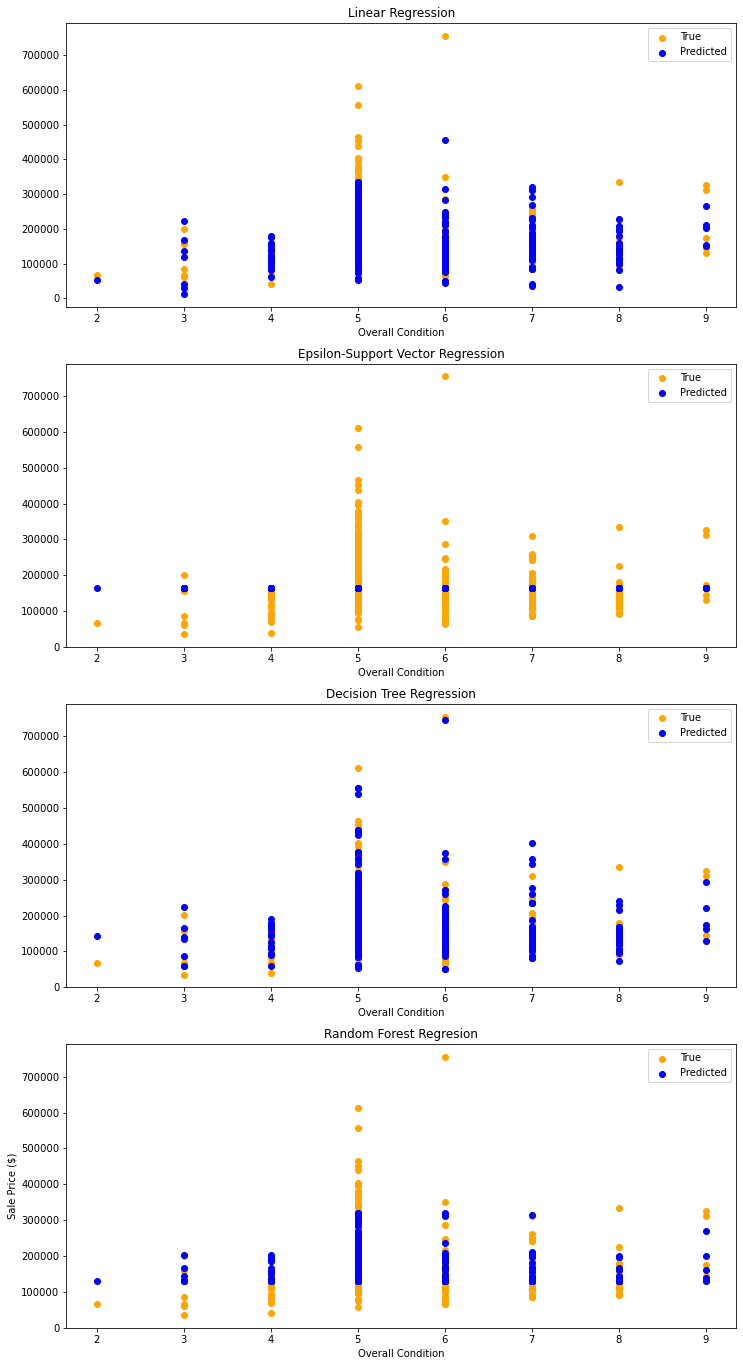

In [147]:
predict_values = [linear_predict, svr_predict, decision_predict, random_predict]

fig, axs = plt.subplots(4, 1, figsize=(12,24))
plt.title('Actual and predicted data')
plt.ylabel('Sale Price ($)')

for i in range(4):
    axs[i].scatter(x_test['OverallCond'], y_test, color="orange", label="True")
    axs[i].scatter(x_test['OverallCond'], predict_values[i], color="blue", label="Predicted")
    axs[i].set_xlabel('Overall Condition')
    axs[i].title.set_text(methods[i])
    axs[i].legend()

Next, we see how will it be like with the feature GarageArea (the area of garage in square feet)

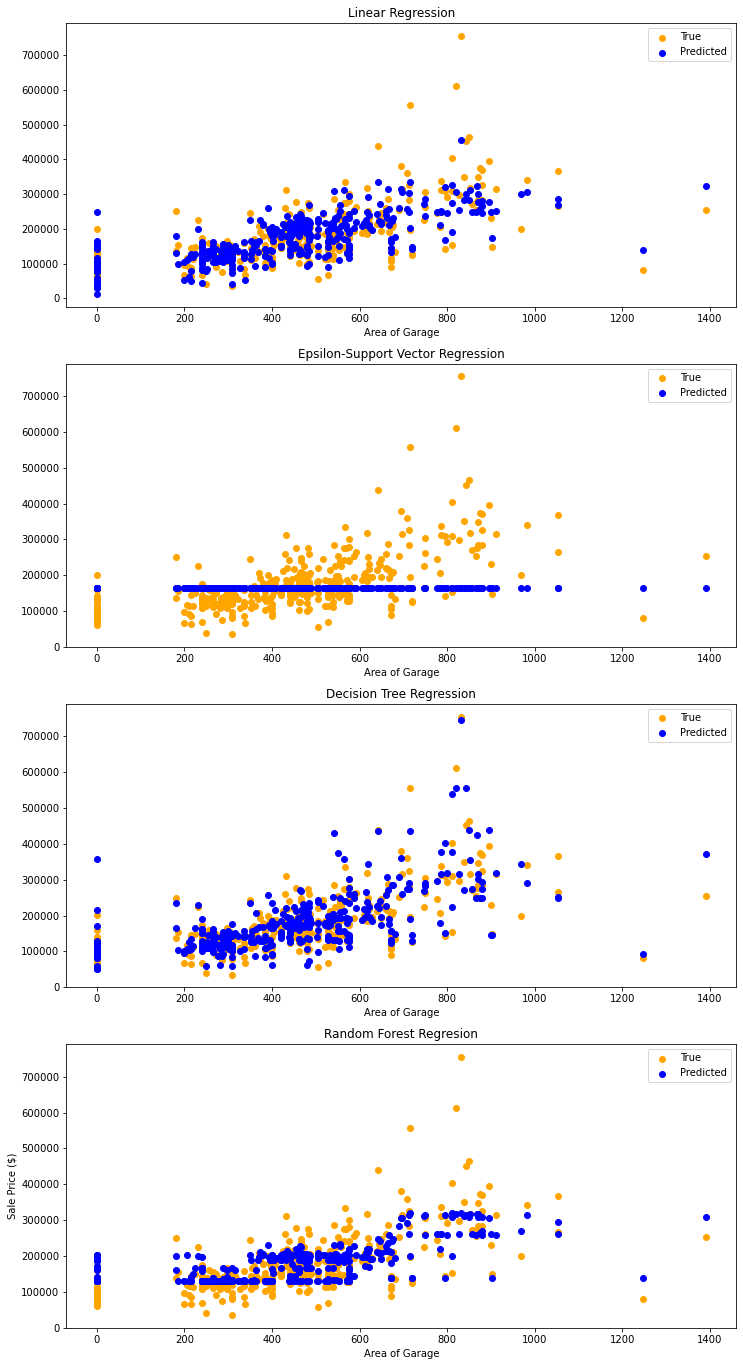

In [148]:
fig, axs = plt.subplots(4, 1, figsize=(12,24))
plt.title('Actual and predicted data')
plt.ylabel('Sale Price ($)')

for i in range(4):
    axs[i].scatter(x_test['GarageArea'], y_test, color="orange", label="True")
    axs[i].scatter(x_test['GarageArea'], predict_values[i], color="blue", label="Predicted")
    axs[i].set_xlabel('Area of Garage')
    axs[i].title.set_text(methods[i])
    axs[i].legend()

In summary, Linear Regression and Decision Tree Regressor did their job very well with the accurate more precise than the other two. However, when we choose the new feature GarageArea and OverallCond, the Random Forest method works slightly better than the previous problem's exploration.